In [59]:
from utils import *
from Agents import *
import torch
import numpy as np
import matplotlib.pyplot as plt


env = Markov_chain('env0')

nb_itérations = 20000
reward = np.zeros((1,env.rewards.shape[1]))
S = []
env.reset()

"""
Standar QL paramètre du papier:
epsilon  : 0.5
alpha    : 0.7
discount : 0.9
"""

agent = Switch_Ql_agent(env, epsilon = 0.5, alpha = 0.2, 
                         discount=0.90, scal = [1, 1])
average_stay_state = []
asa = [1, 0, 0]
for i in range(nb_itérations):
    s = env.current_state
    new_s, r = env.action(agent.act())
    agent.store(s, r, new_s)
    if agent.time_to_learn():
        agent.learn()

    if i % 2000 == 0 and i!=0:
        agent.epsilon /= 2
    
    if s != new_s :
        asa[env.id_state(s)] = 0
        asa[env.id_state(new_s)] += 1
    else:
        asa[env.id_state(s)] += 1
    
    average_stay_state.append(asa.copy())
    S += [s]
    reward = np.concatenate((reward,r), axis = 0)

print(reward)

[[ 0.     0.   ]
 [-0.001 -0.001]
 [-0.018  0.02 ]
 ...
 [-0.018  0.02 ]
 [-0.018  0.02 ]
 [-0.018  0.02 ]]


In [54]:
###Plot

c = np.cumsum(reward, axis = 0)
r1 = [c[o,0] if o - 1000 < 0 else c[o,0] - c[o-1000, 0] for o,i in enumerate(c)]
r2 = [c[o,1] if o - 1000 < 0 else c[o,1] - c[o-1000, 1] for o,i in enumerate(c)]

average1000_r1 = [sum(r1[:i])/1000 \
                  if i < 1000 else sum(r1[i-1000:i])/1000 \
                         for i, r in enumerate(r1) ]

average1000_r2 = [sum(r2[:i])/1000 \
                  if i < 1000 else sum(r2[i-1000:i])/1000 \
                         for i, r in enumerate(r2) ]

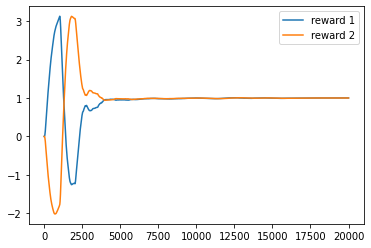

In [56]:
plt.plot(average1000_r1, label="reward 1")
plt.plot(average1000_r2, label="reward 2")
plt.legend()
plt.show()
print()

In [60]:
average_stay_state = np.array(average_stay_state)

average1000_stay_state = [np.sum(average_stay_state[:i], axis=0)/1000 \
                          if i < 1000 else np.sum(average_stay_state[i-1000:i], axis=0)/1000 \
                                 for i, r in enumerate(average_stay_state) ]

average1000_stay_state = np.array(average1000_stay_state)

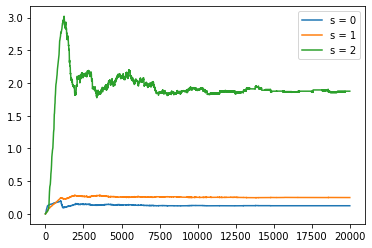

In [61]:
plt.plot(average1000_stay_state[:,0], label="s = 0")
plt.plot(average1000_stay_state[:,1], label="s = 1")
plt.plot(average1000_stay_state[:,2], label="s = 2")
plt.legend()
plt.show()